## Install requirements:
```bash
# in terminal
pip install pandas numpy seaborn matplotlib
```

## Importing the libs

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
from scipy.stats import ttest_ind

In [2]:
warnings.filterwarnings('ignore')

In [3]:
sns.set_theme()

In [4]:
merged_data_path = Path("..") / "data" / "processed" / "MergedData.csv"
merged_df = pd.read_csv(merged_data_path)

In [5]:

merged_df.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,PACK_SIZE (in grams),MONTH_YEAR,YEAR,MONTH_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,116,116179,120232,81,Pringles Original Crisps 134g,2,7.4,Pringles,134,2018-07,2018,July,YOUNG SINGLES/COUPLES,Mainstream
1,2018-07-01,174,174315,175432,71,Twisties Cheese Burger 250g,2,8.6,Twisties,250,2018-07,2018,July,OLDER SINGLES/COUPLES,Premium
2,2018-07-01,89,89003,88123,6,RRD Lime & Pepper 165g,1,3.0,RRD,165,2018-07,2018,July,OLDER SINGLES/COUPLES,Mainstream
3,2018-07-01,30,30005,26519,53,RRD Sweet Chilli & Sour Cream 165g,2,6.0,RRD,165,2018-07,2018,July,OLDER FAMILIES,Premium
4,2018-07-01,21,21037,17576,62,Pringles Mystery Flavour 134g,2,7.4,Pringles,134,2018-07,2018,July,RETIREES,Mainstream
5,2018-07-01,122,122015,124747,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,Doritos,170,2018-07,2018,July,YOUNG FAMILIES,Budget
6,2018-07-01,13,13133,11927,53,RRD Sweet Chilli & Sour Cream 165g,2,6.0,RRD,165,2018-07,2018,July,OLDER SINGLES/COUPLES,Mainstream
7,2018-07-01,210,210159,209607,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,135,2018-07,2018,July,RETIREES,Budget
8,2018-07-01,20,20264,17245,50,Tostitos Lightly Salted 175g,1,4.4,Tostitos,175,2018-07,2018,July,RETIREES,Mainstream
9,2018-07-01,30,30043,26749,48,Red Rock Deli Sp Salt & Truffle 150G,2,5.4,RRD,150,2018-07,2018,July,OLDER FAMILIES,Premium


In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243565 entries, 0 to 243564
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   DATE                  243565 non-null  object 
 1   STORE_NBR             243565 non-null  int64  
 2   LYLTY_CARD_NBR        243565 non-null  int64  
 3   TXN_ID                243565 non-null  int64  
 4   PROD_NBR              243565 non-null  int64  
 5   PROD_NAME             243565 non-null  object 
 6   PROD_QTY              243565 non-null  int64  
 7   TOT_SALES             243565 non-null  float64
 8   BRAND                 243565 non-null  object 
 9   PACK_SIZE (in grams)  243565 non-null  int64  
 10  MONTH_YEAR            243565 non-null  object 
 11  YEAR                  243565 non-null  int64  
 12  MONTH_NAME            243565 non-null  object 
 13  LIFESTAGE             243565 non-null  object 
 14  PREMIUM_CUSTOMER      243565 non-null  object 
dtype

## Pack Size Histogram

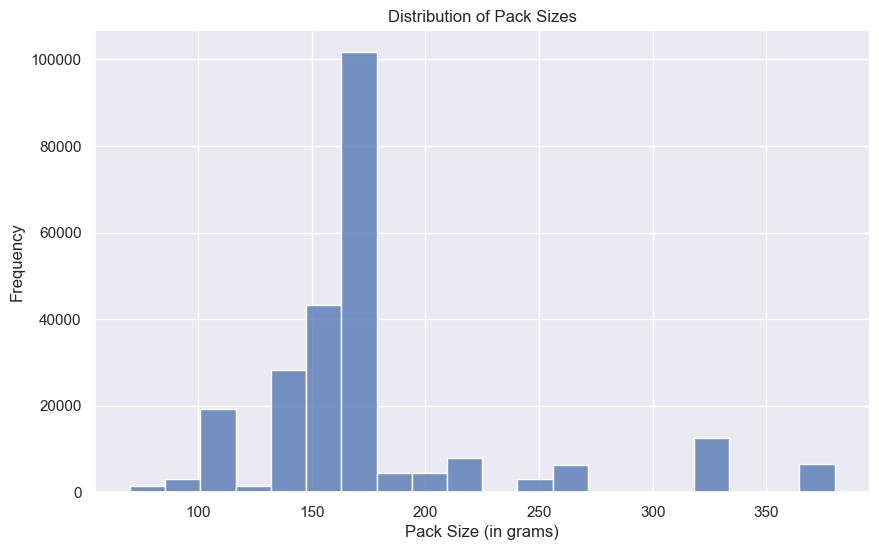

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(merged_df['PACK_SIZE (in grams)'], bins=20, kde=False, ax=ax)
ax.set_title('Distribution of Pack Sizes')
ax.set_xlabel('Pack Size (in grams)')
ax.set_ylabel('Frequency')

# Save the figure to the visuals directory
fig.savefig("visuals/pack_size_hist.png")

plt.show()

## Sales Transactions by LIFESTAGE and PREMIUM_CUSTOMER

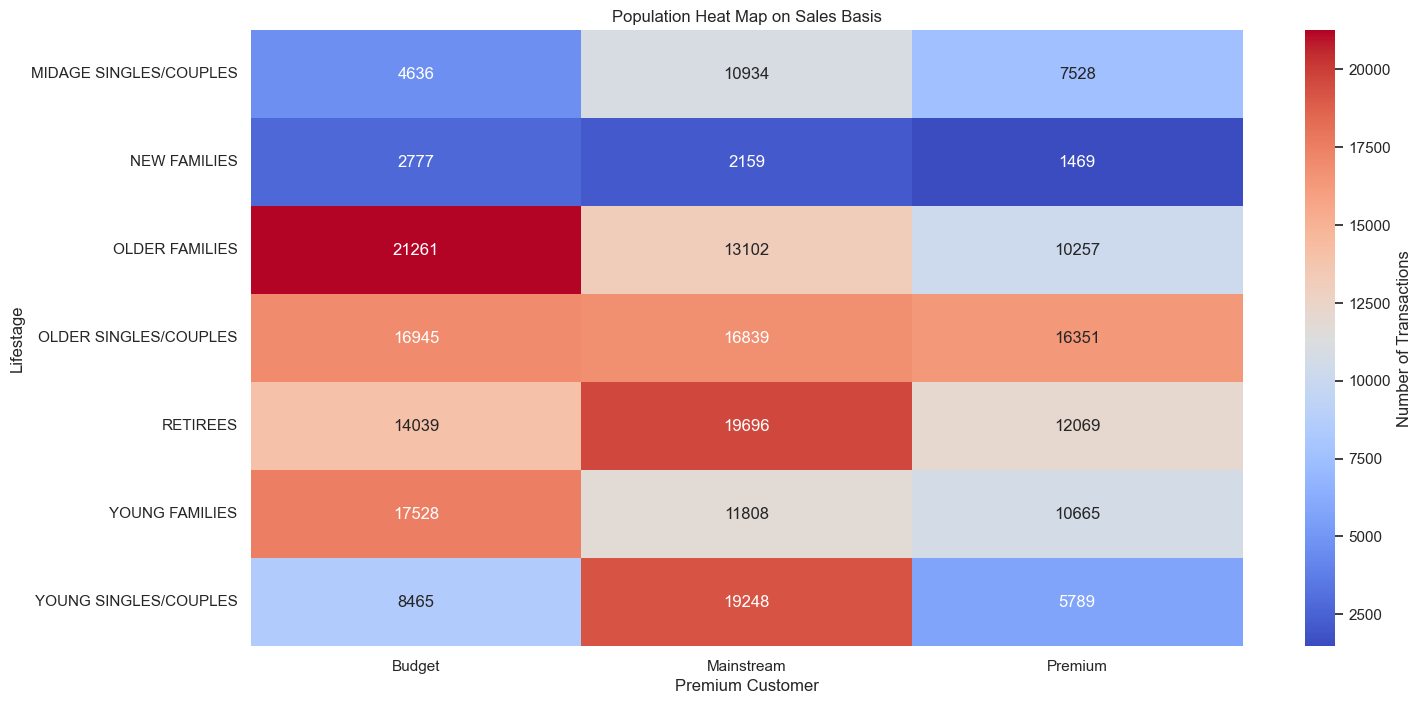

In [8]:
# Create a pivot table to aggregate sales data by LIFESTAGE and PREMIUM_CUSTOMER
sales_pivot = merged_df.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='TXN_ID', aggfunc='count')

# Plot the heatmap
plt.figure(figsize=(16, 8))  # Increased width from 12 to 16
sns.heatmap(sales_pivot, cmap='coolwarm', annot=True, fmt='d', cbar_kws={'label': 'Number of Transactions'})
plt.title('Population Heat Map on Sales Basis')
plt.xlabel('Premium Customer')
plt.ylabel('Lifestage')

# Save the heatmap to the visuals directory
plt.savefig("visuals/sales_heatmap.png", bbox_inches='tight')  # Ensure the entire plot is saved

plt.show()

## Sales amount by LIFESTAGE and PREMIUM_CUSTOMER

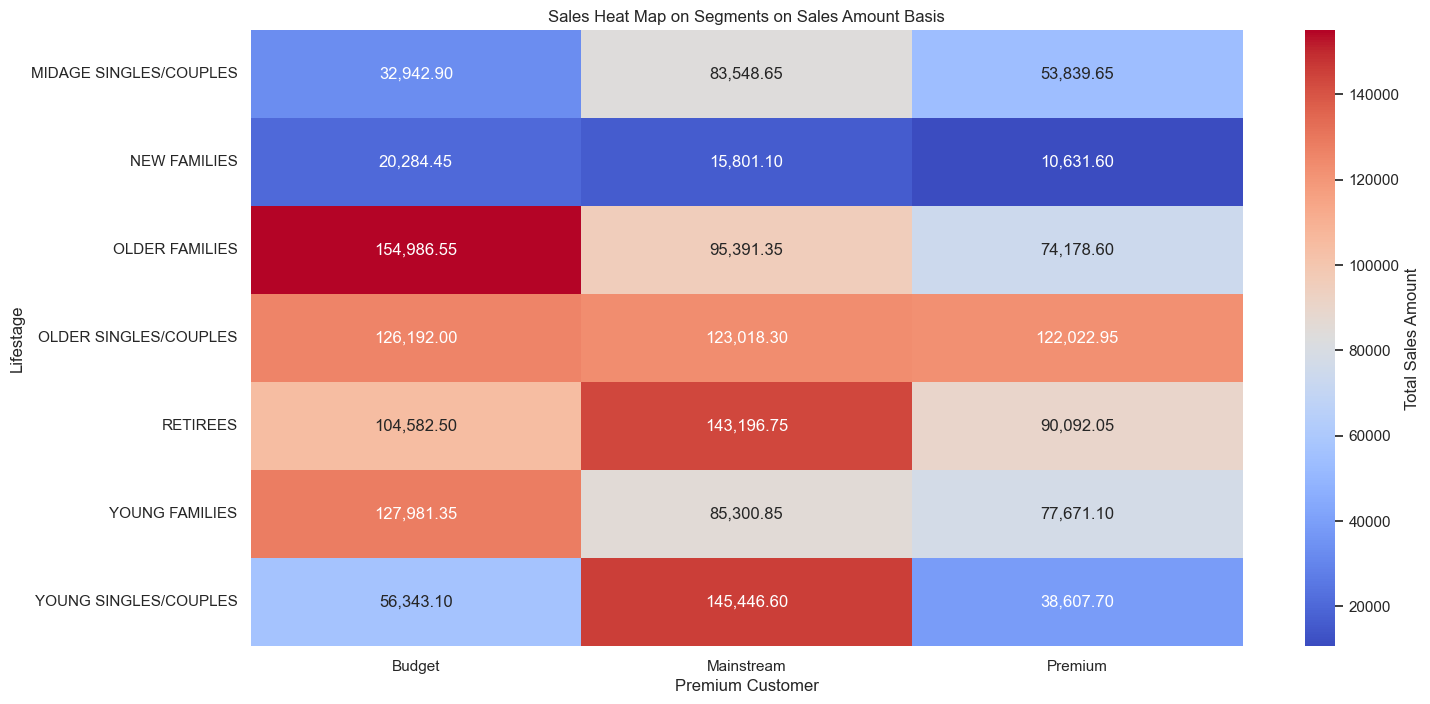

In [9]:

# Create a pivot table to aggregate sales amount by LIFESTAGE and PREMIUM_CUSTOMER
sales_amount_pivot = merged_df.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='TOT_SALES', aggfunc='sum')

# Format the sales amount with commas for readability
sales_amount_pivot_formatted = sales_amount_pivot.applymap(lambda x: f"{x:,.2f}")

# Plot the heatmap
plt.figure(figsize=(16, 8))  # Increased width from 12 to 16
sns.heatmap(sales_amount_pivot, cmap='coolwarm', annot=sales_amount_pivot_formatted, fmt='', cbar_kws={'label': 'Total Sales Amount'})
plt.title('Sales Heat Map on Segments on Sales Amount Basis')
plt.xlabel('Premium Customer')
plt.ylabel('Lifestage')

# Save the heatmap to the visuals directory
plt.savefig("visuals/sales_amount_heatmap.png", bbox_inches='tight')  # Ensure the entire plot is saved

plt.show()


## Average number of chips purchased by LIFESTAGE and PREMIUM_CUSTOMER

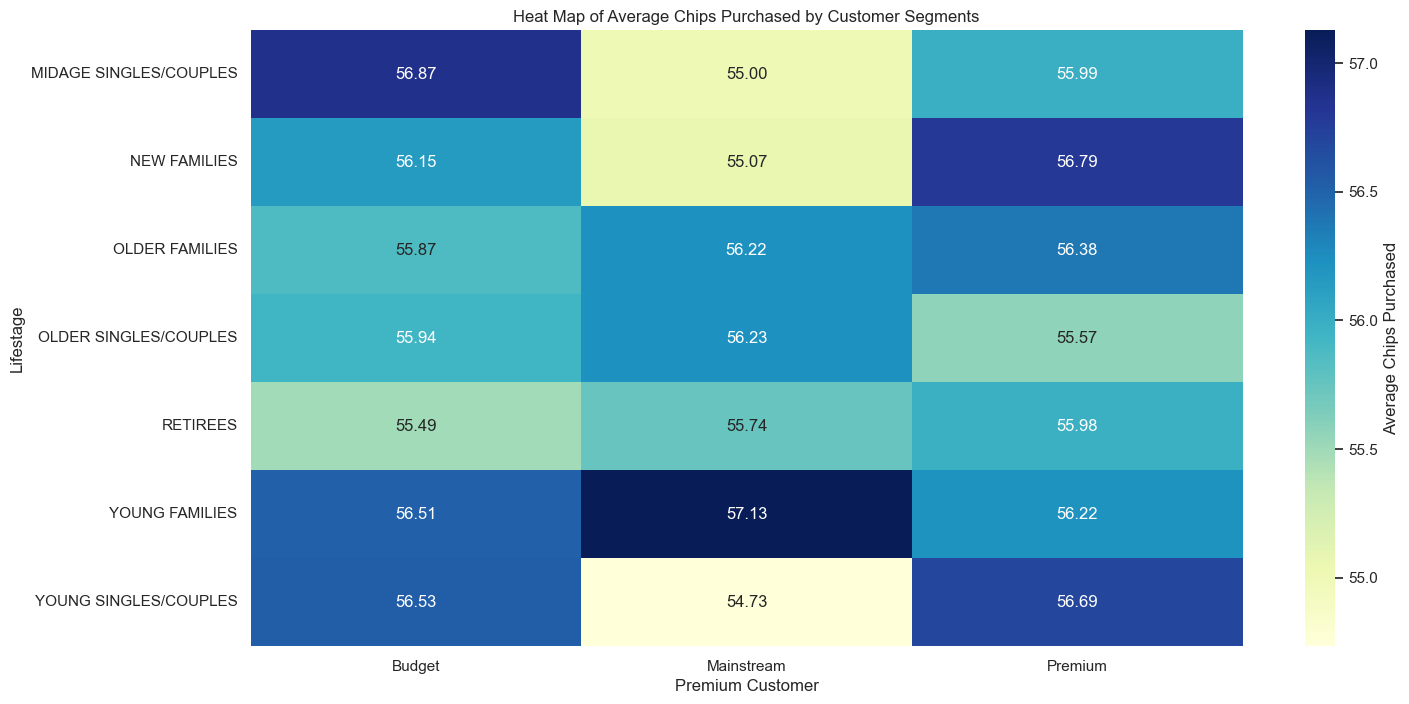

In [10]:

# Create a pivot table to calculate the average number of chips purchased by LIFESTAGE and PREMIUM_CUSTOMER
average_chips_pivot = merged_df.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='PROD_NBR', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(16, 8))  # Increased width from 12 to 16
sns.heatmap(average_chips_pivot, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Average Chips Purchased'})
plt.title('Heat Map of Average Chips Purchased by Customer Segments')
plt.xlabel('Premium Customer')
plt.ylabel('Lifestage')

# Save the heatmap to the visuals directory with increased width
plt.savefig("visuals/average_chips_heatmap.png", bbox_inches='tight')  # Ensure the entire plot is saved with increased width

plt.show()



## Average price paid by LIFESTAGE and PREMIUM_CUSTOMER

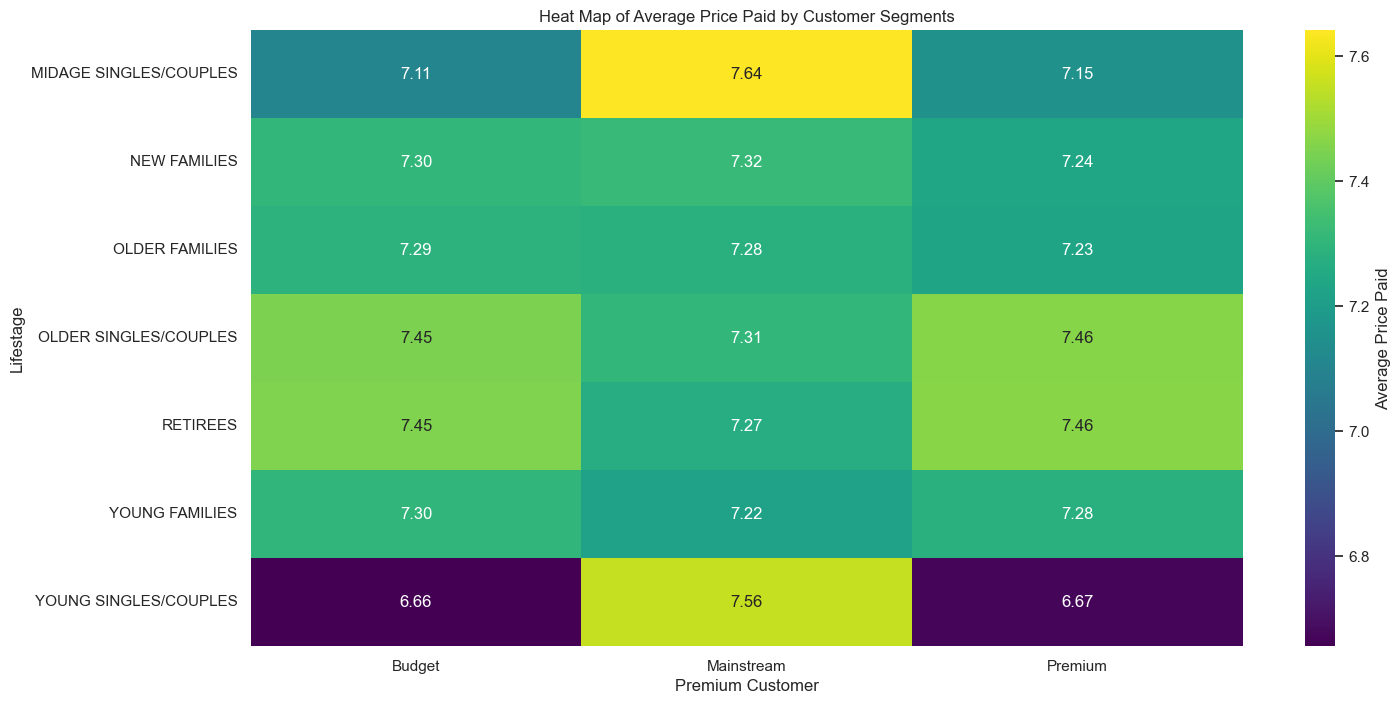

In [11]:

# Create a pivot table to calculate the average price paid by LIFESTAGE and PREMIUM_CUSTOMER
average_price_pivot = merged_df.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='TOT_SALES', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(16, 8))  # Increased width from 12 to 16
sns.heatmap(average_price_pivot, cmap='viridis', annot=True, fmt='.2f', cbar_kws={'label': 'Average Price Paid'})
plt.title('Heat Map of Average Price Paid by Customer Segments')
plt.xlabel('Premium Customer')
plt.ylabel('Lifestage')

# Save the heatmap to the visuals directory with increased width
plt.savefig("visuals/average_price_heatmap.png", bbox_inches='tight')  # Ensure the entire plot is saved with increased width

plt.show()



## Most selling chips by brand

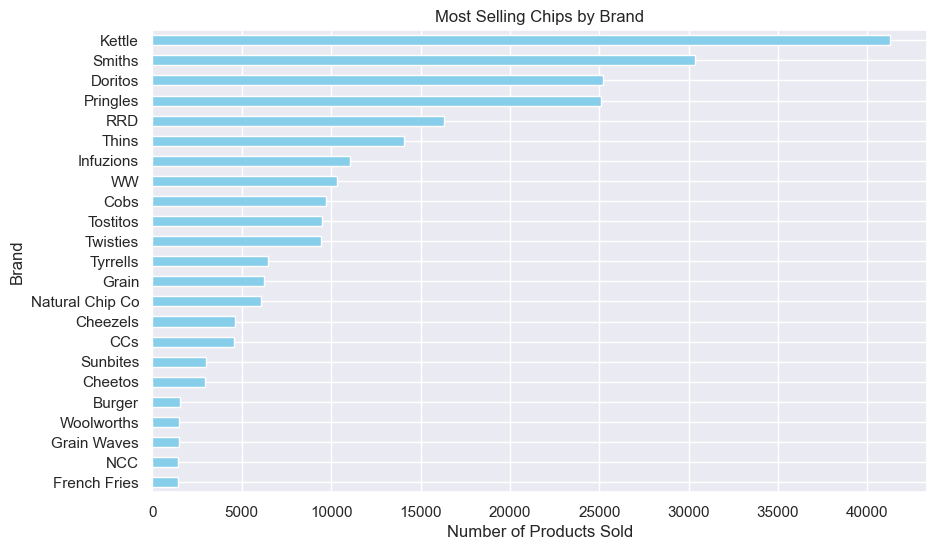

In [12]:
# Create a bar plot of the most selling chips by brand
most_selling_chips = merged_df.groupby('BRAND')['PROD_NBR'].count().sort_values(ascending=False)

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
most_selling_chips.plot(kind='barh', color='skyblue')
plt.title('Most Selling Chips by Brand')
plt.xlabel('Number of Products Sold')
plt.ylabel('Brand')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values at the top

# Save the bar chart to the visuals directory
plt.savefig("visuals/most_selling_chips_by_brand.png")

plt.show()


## Sales over time

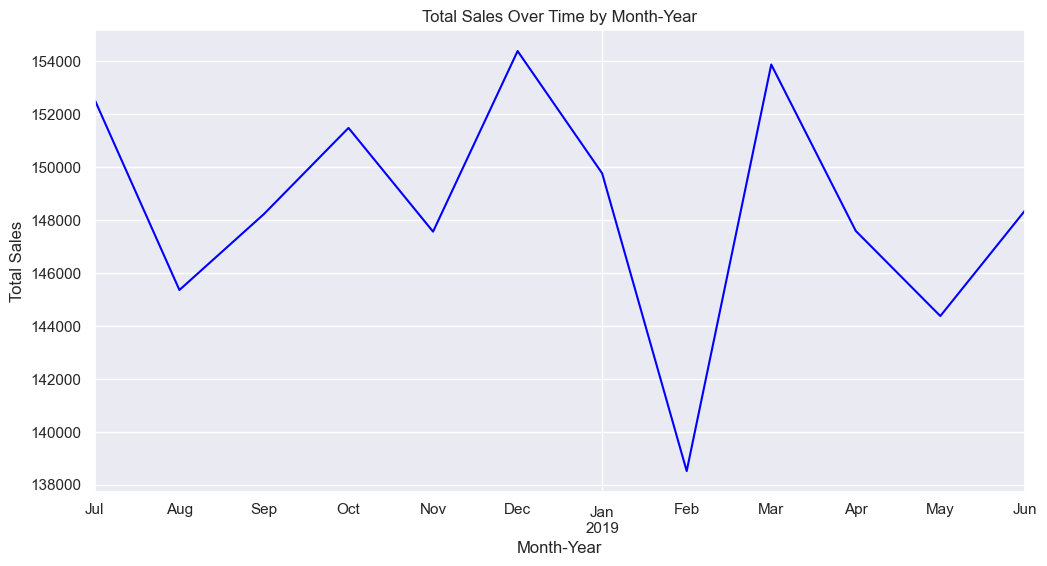

In [13]:
# Create a line plot of total sales over time based on month year
plt.figure(figsize=(12, 6))  # Reduced height from 8 to 6
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])  # Ensure DATE is in datetime format
merged_df['Month_name'] = merged_df['DATE'].dt.to_period('M')  # Extract month-year
sales_over_time = merged_df.groupby('Month_name')['TOT_SALES'].sum()
sales_over_time.plot(kind='line', color='blue')
plt.title('Total Sales Over Time by Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')

# Save the line plot to the visuals directory
plt.savefig("visuals/total_sales_over_time_by_Month_name.png")

plt.show()

## seasonal trend of customer segments by month-year

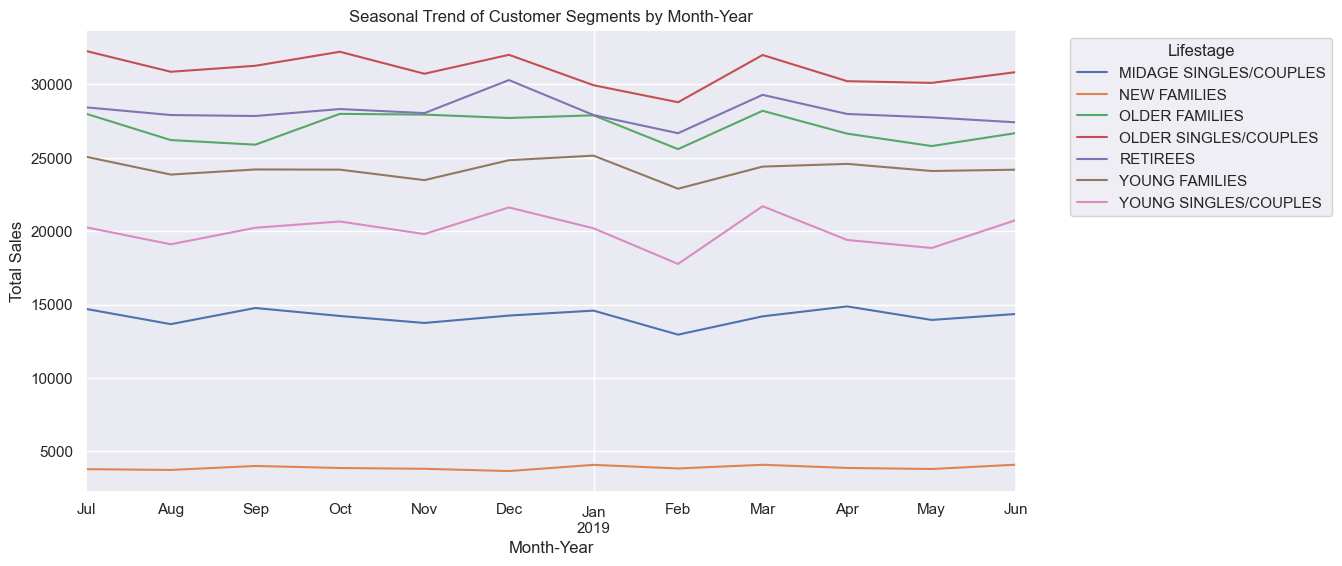

In [14]:
# Create a line plot to show the seasonal trend of customer segments by month-year
plt.figure(figsize=(12, 6))
customer_segment_trend = merged_df.groupby(['Month_name', 'LIFESTAGE'])['TOT_SALES'].sum().unstack()
customer_segment_trend.plot(kind='line', ax=plt.gca())
plt.title('Seasonal Trend of Customer Segments by Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.legend(title='Lifestage', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the line plot to the visuals directory
plt.savefig("visuals/seasonal_trend_customer_segments_by_Month_name.png")

plt.show()

## customer retention over month name

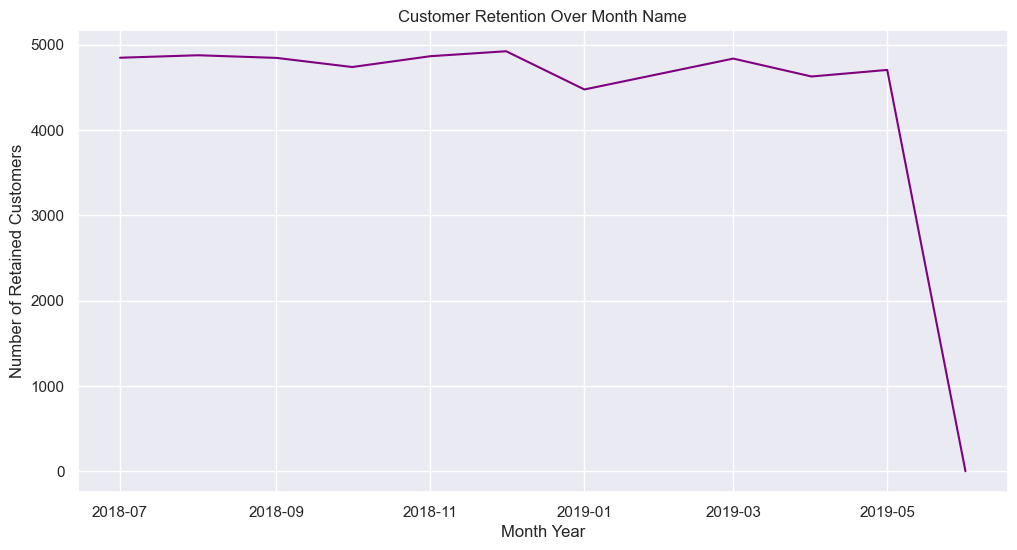

In [15]:

# Create a line plot to show customer retention over month name
plt.figure(figsize=(12, 6))
# Calculate the number of returning customers each month name
merged_df['PREV_Month_name'] = merged_df['DATE'] - pd.DateOffset(months=1)
merged_df['PREV_Month_name'] = merged_df['PREV_Month_name'].dt.to_period('M')
merged_df['Month_name'] = merged_df['DATE'].dt.to_period('M')
prev_month_customers = merged_df.groupby('PREV_Month_name')['LYLTY_CARD_NBR'].unique()
current_month_customers = merged_df.groupby('Month_name')['LYLTY_CARD_NBR'].unique()

# Calculate retention as the number of customers in the current month name who were also present in the previous month name
retention_rate = [len(set(current_month_customers[month]).intersection(set(prev_month_customers.get(month, [])))) 
                  for month in current_month_customers.index]

# Plot the retention rate
plt.plot(current_month_customers.index.to_timestamp(), retention_rate, color='purple')
plt.title('Customer Retention Over Month Name')
plt.xlabel('Month Year')
plt.ylabel('Number of Retained Customers')

# Save the line plot to the visuals directory
plt.savefig("visuals/customer_retention_over_Month_name.png")

plt.show()


## Correlation of population to sales by customer segments

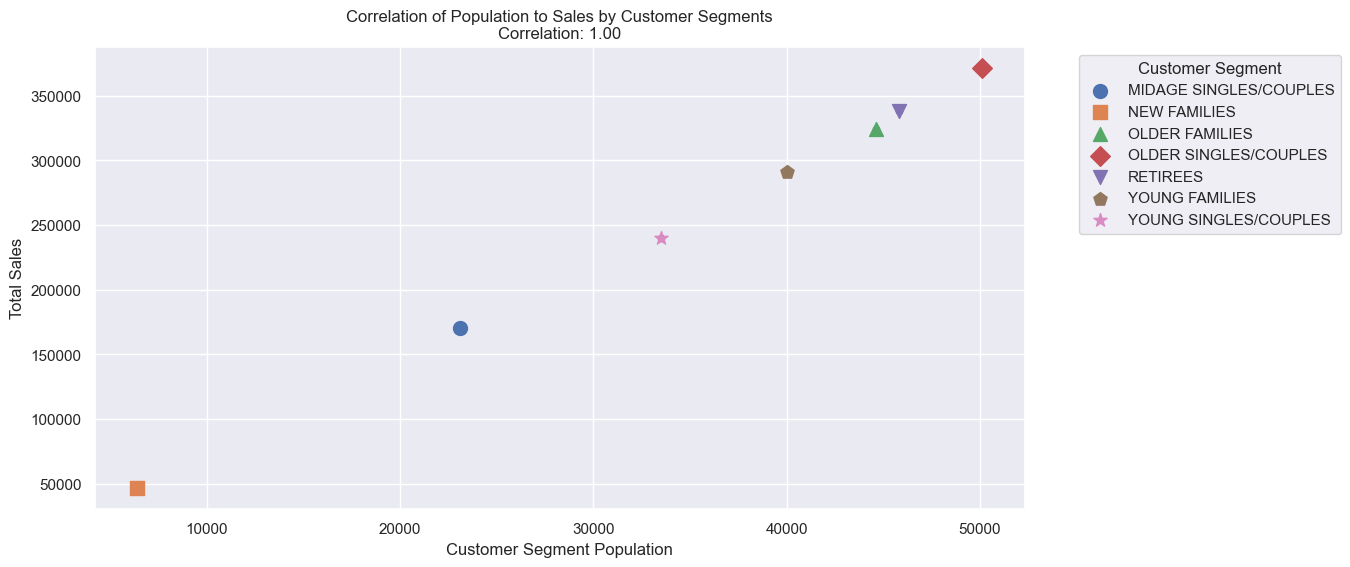

In [16]:
# Analyze the correlation of population to sales by customer segments
plt.figure(figsize=(12, 6))

# Calculate the population of each customer segment
customer_segment_population = merged_df['LIFESTAGE'].value_counts()

# Calculate the total sales for each customer segment
customer_segment_sales = merged_df.groupby('LIFESTAGE')['TOT_SALES'].sum()

# Create a DataFrame for correlation analysis
correlation_df = pd.DataFrame({
    'Population': customer_segment_population,
    'Total Sales': customer_segment_sales
})

# Calculate the correlation
correlation = correlation_df.corr().loc['Population', 'Total Sales']

# Plot the data
ax = correlation_df.plot(kind='scatter', x='Population', y='Total Sales', ax=plt.gca())

# Add larger symbols for each customer segment
symbols = ['o', 's', '^', 'D', 'v', 'p', '*', 'h', 'x', '+']
for i, (index, row) in enumerate(correlation_df.iterrows()):
    ax.scatter(row['Population'], row['Total Sales'], label=index, marker=symbols[i % len(symbols)], s=100)  # Increased size

plt.title(f'Correlation of Population to Sales by Customer Segments\nCorrelation: {correlation:.2f}')
plt.xlabel('Customer Segment Population')
plt.ylabel('Total Sales')

# Add a legend on the side
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the scatter plot to the visuals directory
plt.savefig("visuals/correlation_population_to_sales_by_segments.png")

plt.show()


## Correlation of customer population to sales by premium, mainstream, and budget categories

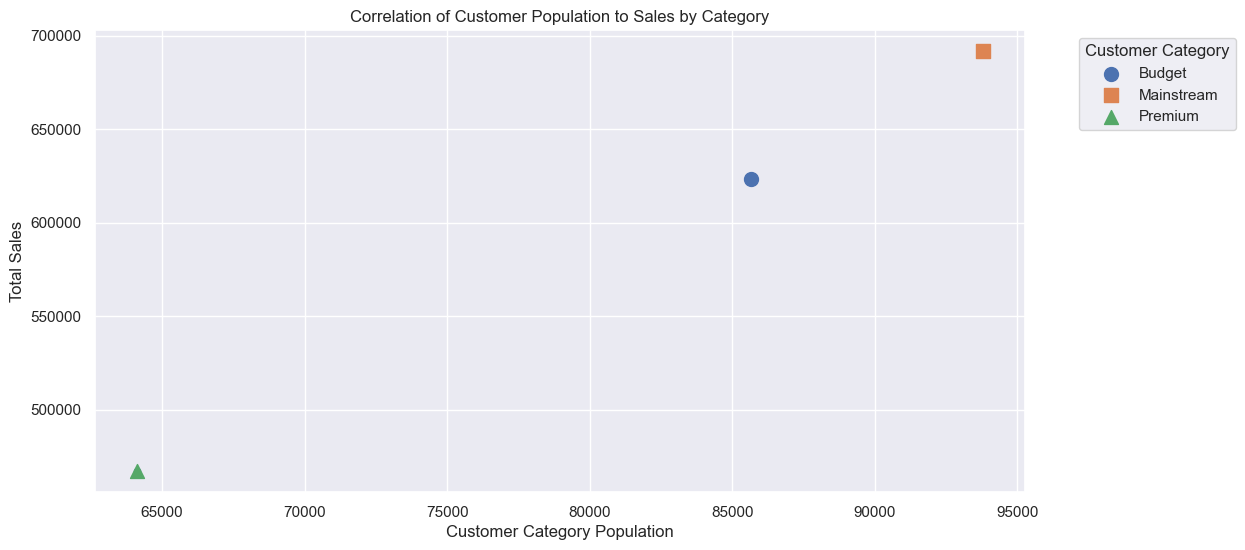

In [17]:

# Analyze the correlation of customer population to sales by premium, mainstream, and budget categories
plt.figure(figsize=(12, 6))

# Calculate the population for each customer category
customer_category_population = merged_df['PREMIUM_CUSTOMER'].value_counts()

# Calculate the total sales for each customer category
customer_category_sales = merged_df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()

# Create a DataFrame for correlation analysis
category_correlation_df = pd.DataFrame({
    'Population': customer_category_population,
    'Total Sales': customer_category_sales
})

# Plot the data
ax = category_correlation_df.plot(kind='scatter', x='Population', y='Total Sales', ax=plt.gca())

# Add larger symbols for each customer category
symbols = ['o', 's', '^']
for i, (index, row) in enumerate(category_correlation_df.iterrows()):
    ax.scatter(row['Population'], row['Total Sales'], label=index, marker=symbols[i % len(symbols)], s=100)  # Increased size

plt.title('Correlation of Customer Population to Sales by Category')
plt.xlabel('Customer Category Population')
plt.ylabel('Total Sales')

# Add a legend on the side
plt.legend(title='Customer Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the scatter plot to the visuals directory
plt.savefig("visuals/correlation_population_to_sales_by_category.png")

plt.show()


## T-Test

In [18]:
# Perform an independent t-test between mainstream vs premium and budget mid age and young singles and couples

# Filter the data for the relevant customer segments
# We are interested in comparing 'Mainstream' customers with 'Premium' and 'Budget' customers
# within the 'MIDAGE SINGLES/COUPLES' and 'YOUNG SINGLES/COUPLES' lifestages.

# Extract data for 'Mainstream' customers in the specified lifestages
mainstream_data = merged_df[(merged_df['PREMIUM_CUSTOMER'] == 'Mainstream') & 
                            (merged_df['LIFESTAGE'].isin(['MIDAGE SINGLES/COUPLES', 'YOUNG SINGLES/COUPLES']))]

# Extract data for 'Premium' and 'Budget' customers in the specified lifestages
premium_budget_data = merged_df[(merged_df['PREMIUM_CUSTOMER'].isin(['Premium', 'Budget'])) & 
                                (merged_df['LIFESTAGE'].isin(['MIDAGE SINGLES/COUPLES', 'YOUNG SINGLES/COUPLES']))]

# Extract the total sales for each group
# We will compare the total sales of these groups to see if there is a significant difference
mainstream_sales = mainstream_data['TOT_SALES']
premium_budget_sales = premium_budget_data['TOT_SALES']

# Perform the t-test
# The t-test will help us determine if there is a statistically significant difference in the means of the two groups
t_stat, p_value = ttest_ind(mainstream_sales, premium_budget_sales, equal_var=False)

# Print the results
# The t-statistic tells us the size of the difference relative to the variation in our sample data
# The p-value tells us the probability of observing the data, or something more extreme, if the null hypothesis is true
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation:
# A low p-value (typically ≤ 0.05) indicates that we can reject the null hypothesis, meaning there is a significant difference
# between the sales of 'Mainstream' customers and 'Premium'/'Budget' customers in the specified lifestages.



T-statistic: 33.09401503555879, P-value: 8.262934974264039e-238


##### The interpretation of the T-Test results:
The T-statistic is 33.094, which indicates a large difference between the means of the two groups relative to the variation in the data.
The P-value is extremely small (8.26e-238), which is far below the typical significance level of 0.05.
This suggests that the difference in total sales between 'Mainstream' customers and 'Premium'/'Budget' customers
within the 'MIDAGE SINGLES/COUPLES' and 'YOUNG SINGLES/COUPLES' lifestages is statistically significant.
Therefore, we can confidently reject the null hypothesis, concluding that there is a significant difference in sales between these groups.




## most bought brands by customer segment

In [19]:

# Calculate the most bought brands by customer segment
# Group the data by 'LIFESTAGE', 'PREMIUM_CUSTOMER', and 'BRAND'
# Then sum the 'TOT_SALES' to find the most bought brands in each segment

# Group by 'LIFESTAGE', 'PREMIUM_CUSTOMER', and 'BRAND'
brand_sales_by_segment = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'BRAND'])['TOT_SALES'].sum().reset_index()

# Sort the results within each segment to find the most bought brands
most_bought_brands = brand_sales_by_segment.sort_values(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'TOT_SALES'], ascending=[True, True, False])

# Create a table to display the top brand for each segment
top_brands_table = most_bought_brands.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).first().reset_index()

# Display the table
print(top_brands_table[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'BRAND', 'TOT_SALES']])





                 LIFESTAGE PREMIUM_CUSTOMER   BRAND  TOT_SALES
0   MIDAGE SINGLES/COUPLES           Budget  Kettle     6736.2
1   MIDAGE SINGLES/COUPLES       Mainstream  Kettle    20231.8
2   MIDAGE SINGLES/COUPLES          Premium  Kettle    11390.2
3             NEW FAMILIES           Budget  Kettle     4731.6
4             NEW FAMILIES       Mainstream  Kettle     3847.0
5             NEW FAMILIES          Premium  Kettle     2267.6
6           OLDER FAMILIES           Budget  Kettle    32058.0
7           OLDER FAMILIES       Mainstream  Kettle    19420.2
8           OLDER FAMILIES          Premium  Kettle    14505.8
9    OLDER SINGLES/COUPLES           Budget  Kettle    29066.4
10   OLDER SINGLES/COUPLES       Mainstream  Kettle    26852.8
11   OLDER SINGLES/COUPLES          Premium  Kettle    27943.4
12                RETIREES           Budget  Kettle    24340.0
13                RETIREES       Mainstream  Kettle    31652.4
14                RETIREES          Premium  Kettle    

## Finding most selling flavours by frequency table 

In [20]:

# Making anew column fro Flavour words
merged_df['FLAVOUR'] = merged_df['PROD_NAME']'
merged_df['FLAVOUR'] = merged_df['FLAVOUR'].str.split(' ').str[1:]
merged_df['FLAVOUR'] = merged_df['FLAVOUR'].apply(lambda x: ' '.join(x[:-1]))

In [21]:
# Create a frequency table of each word in the 'FLAVOUR' column

flavour_words = merged_df['FLAVOUR'].str.split(expand=True).stack()

flavour_word_frequency = flavour_words.value_counts().reset_index()

flavour_word_frequency.columns = ['Word', 'Frequency']

flavour_word_frequency = flavour_word_frequency.sort_values(by='Frequency', ascending=False)

processed_data_dir = Path('..') / 'data' / 'processed'
flavour_word_frequency.to_csv(processed_data_dir / 'flavour_frequency.csv', index=False)

flavour_word_frequency.head(20)

,Word,Frequency
0,Chips,49770
1,&,34107
2,Cheese,27890
3,Salt,24719
4,Crinkle,22490
5,Corn,22061
6,Original,21560
7,Cut,19283
8,Chip,18645
9,Chicken,15406


## Top segments

In [22]:
# Create separate dataframes for the top 3 segments with the most sales amount

# First, calculate the total sales amount for each segment
segment_sales = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Sort the segments by total sales amount in descending order
top_segments = segment_sales.sort_values(by='TOT_SALES', ascending=False).head(3)

# Create separate dataframes for each of the top 3 segments
top_segment_1 = merged_df[(merged_df['LIFESTAGE'] == top_segments.iloc[0]['LIFESTAGE']) & 
                          (merged_df['PREMIUM_CUSTOMER'] == top_segments.iloc[0]['PREMIUM_CUSTOMER'])]

top_segment_2 = merged_df[(merged_df['LIFESTAGE'] == top_segments.iloc[1]['LIFESTAGE']) & 
                          (merged_df['PREMIUM_CUSTOMER'] == top_segments.iloc[1]['PREMIUM_CUSTOMER'])]

top_segment_3 = merged_df[(merged_df['LIFESTAGE'] == top_segments.iloc[2]['LIFESTAGE']) & 
                          (merged_df['PREMIUM_CUSTOMER'] == top_segments.iloc[2]['PREMIUM_CUSTOMER'])]


In [28]:
top_segments

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
6,OLDER FAMILIES,Budget,154986.55
19,YOUNG SINGLES/COUPLES,Mainstream,145446.60
13,RETIREES,Mainstream,143196.75


In [23]:
# Find the most bought brands for each top segment

# Create a function to get the most bought brand for a given segment
def get_most_bought_brands(segment_df):
    return segment_df.groupby('BRAND')['TOT_SALES'].sum().sort_values(ascending=False).head(1)

# Get the most bought brand for each of the top 3 segments
most_bought_brand_segment_1 = get_most_bought_brands(top_segment_1)
most_bought_brand_segment_2 = get_most_bought_brands(top_segment_2)
most_bought_brand_segment_3 = get_most_bought_brands(top_segment_3)

# Display the most bought brands for each segment
print("Most bought brand for top segment 1:")
print(most_bought_brand_segment_1)

print("\nMost bought brand for top segment 2:")
print(most_bought_brand_segment_2)

print("\nMost bought brand for top segment 3:")
print(most_bought_brand_segment_3)

Most bought brand for top segment 1:
BRAND
Kettle    32058.0
Name: TOT_SALES, dtype: float64

Most bought brand for top segment 2:
BRAND
Kettle    35423.6
Name: TOT_SALES, dtype: float64

Most bought brand for top segment 3:
BRAND
Kettle    31652.4
Name: TOT_SALES, dtype: float64


### Top segments buying Tendencies

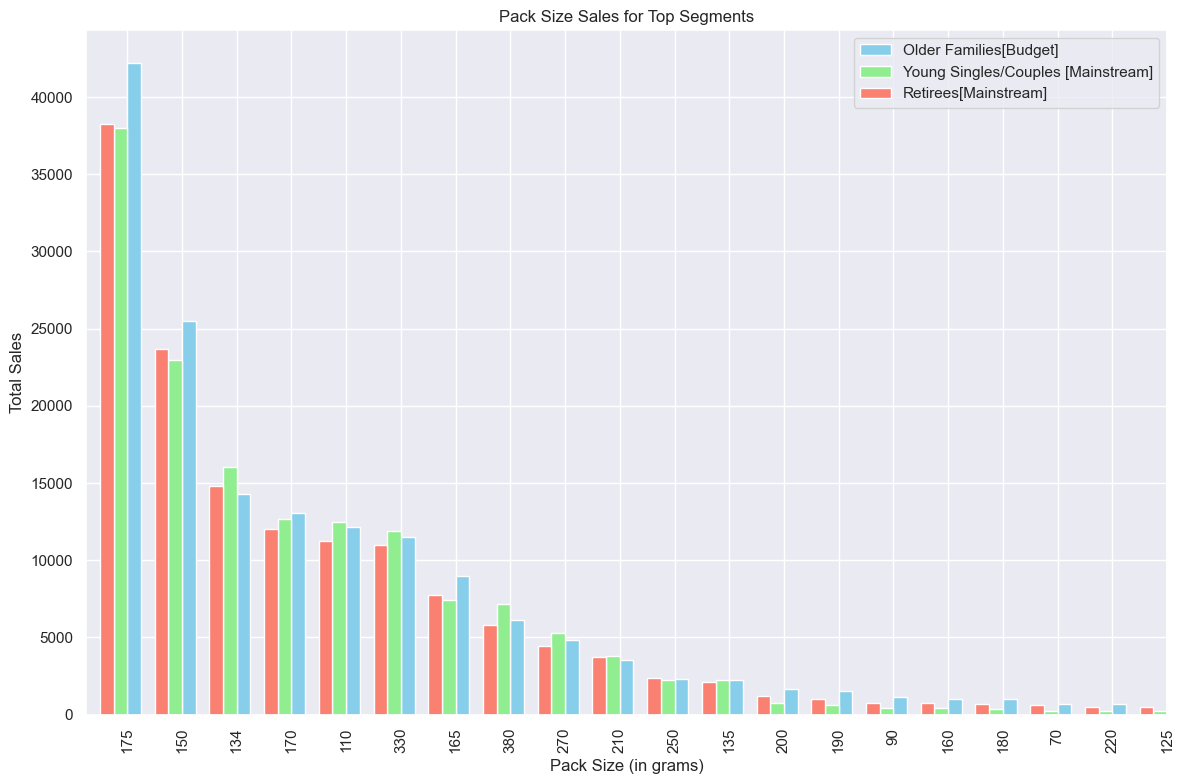

In [29]:

# Calculate total sales by pack size for each top segment and plot the results

# Create a function to get total sales by pack size for a given segment
def get_pack_size_sales(segment_df):
    return segment_df.groupby('PACK_SIZE (in grams)')['TOT_SALES'].sum().sort_values(ascending=False)

# Get total sales by pack size for each of the top 3 segments
pack_size_sales_segment_1 = get_pack_size_sales(top_segment_1)
pack_size_sales_segment_2 = get_pack_size_sales(top_segment_2)
pack_size_sales_segment_3 = get_pack_size_sales(top_segment_3)

# Plot total sales by pack size for each segment in a single figure
plt.figure(figsize=(12, 8))

pack_size_sales_segment_1.plot(kind='bar', color='skyblue', position=0, width=0.25, label='Older Families[Budget]')
pack_size_sales_segment_2.plot(kind='bar', color='lightgreen', position=1, width=0.25, label='Young Singles/Couples [Mainstream]')
pack_size_sales_segment_3.plot(kind='bar', color='salmon', position=2, width=0.25, label='Retirees[Mainstream]')

plt.title('Pack Size Sales for Top Segments')
plt.xlabel('Pack Size (in grams)')
plt.ylabel('Total Sales')
plt.legend()

plt.tight_layout()
plt.show()



### Top Segmenst Buying Trends over time [Month_Year]

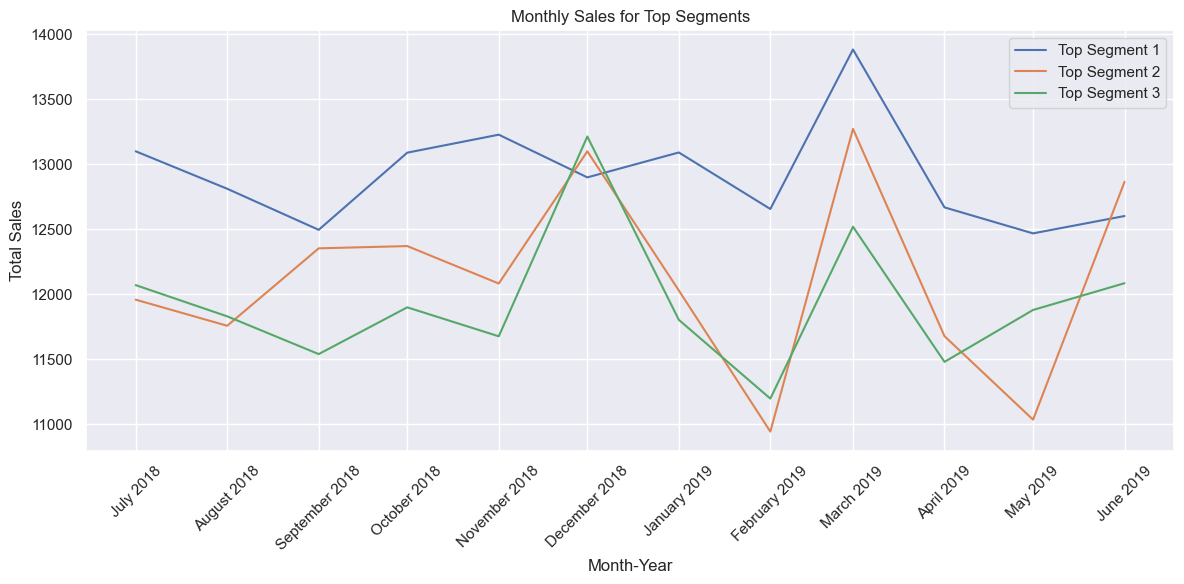

In [25]:
# Create a function to get monthly sales for a given segment
def get_monthly_sales(segment_df):
    segment_df['DATE'] = pd.to_datetime(segment_df['DATE'])
    return segment_df.groupby(segment_df['DATE'].dt.to_period('M'))['TOT_SALES'].sum()

# Get monthly sales for each of the top 3 segments
monthly_sales_segment_1 = get_monthly_sales(top_segment_1)
monthly_sales_segment_2 = get_monthly_sales(top_segment_2)
monthly_sales_segment_3 = get_monthly_sales(top_segment_3)

# Plot the monthly sales for each segment
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_segment_1.index.to_timestamp(), monthly_sales_segment_1.values, label='Top Segment 1')
plt.plot(monthly_sales_segment_2.index.to_timestamp(), monthly_sales_segment_2.values, label='Top Segment 2')
plt.plot(monthly_sales_segment_3.index.to_timestamp(), monthly_sales_segment_3.values, label='Top Segment 3')

plt.title('Monthly Sales for Top Segments')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)

# Add month names to the x-axis
month_names = monthly_sales_segment_1.index.to_timestamp().strftime('%B %Y')
plt.xticks(monthly_sales_segment_1.index.to_timestamp(), month_names, rotation=45)

plt.tight_layout()
plt.show()

### Store Numbers with high Top Segment Population

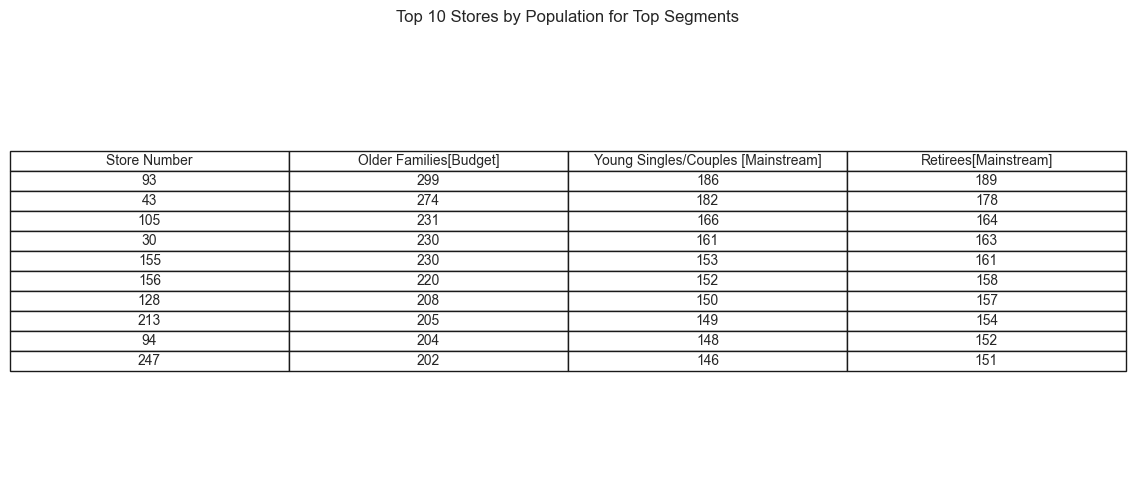

In [34]:

# Create a function to get the top 10 stores by population for a given segment
def get_top_stores(segment_df):
    return segment_df['STORE_NBR'].value_counts().nlargest(10).sort_values(ascending=False)

# Get top 10 stores for each of the top 3 segments
top_stores_segment_1 = get_top_stores(top_segment_1)
top_stores_segment_2 = get_top_stores(top_segment_2)
top_stores_segment_3 = get_top_stores(top_segment_3)

# Create a visual table for the top 10 stores for each segment
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')

# Prepare data for the table
table_data = [
    ['Store Number', 'Older Families[Budget]', 'Young Singles/Couples [Mainstream]', 'Retirees[Mainstream]']
] + list(zip(top_stores_segment_1.index, top_stores_segment_1.values, top_stores_segment_2.values, top_stores_segment_3.values))

# Create the table
table = ax.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.title('Top 10 Stores by Population for Top Segments')
plt.show()
